In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from lsst.all_sky_phot.wcs import Fisheye, load_fisheye
from lsst.all_sky_phot import forced_phot, readYBC, readcr2, lsst_earth_location, radec2altaz
import healpy as hp
import glob

from lsst.sims.cloud.prediction import CloudMap, CloudServer, fromHpix, cloudConfig

In [2]:
temp = np.load('forced_phot_results/trans_maps.npz')
mjds=temp['mjds'].copy()
hpmaps=temp['hpmaps'].copy()
files=temp['files'].copy()
temp.close()

In [3]:
cloud_types = {'clear_dark': 'ut012716/ut012716.0112.long.cr2',
               'bright_clear': 'ut012516/ut012516.0450.long.cr2',
               'bright_cloudy': 'ut012616/ut012616.0470.long.cr2'}

/Users/yoachim/lsstp3/DarwinX86/healpy/1.10.3.lsst1/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/DarwinX86/healpy/1.10.3.lsst1/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/DarwinX86/healpy/1.10.3.lsst1/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


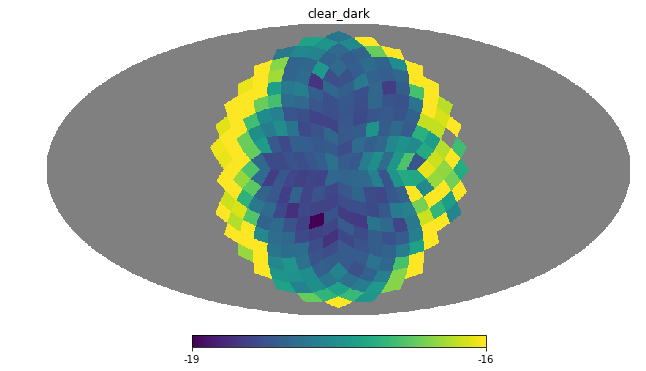

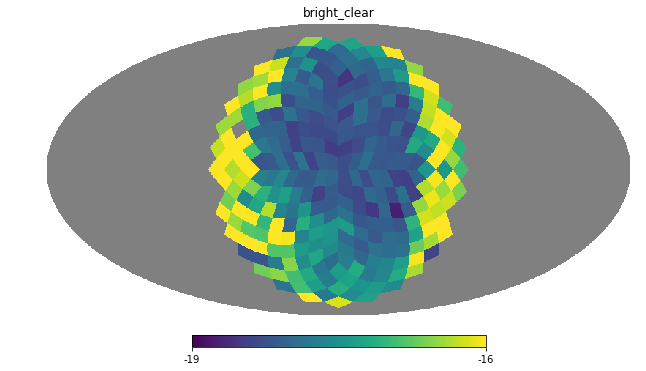

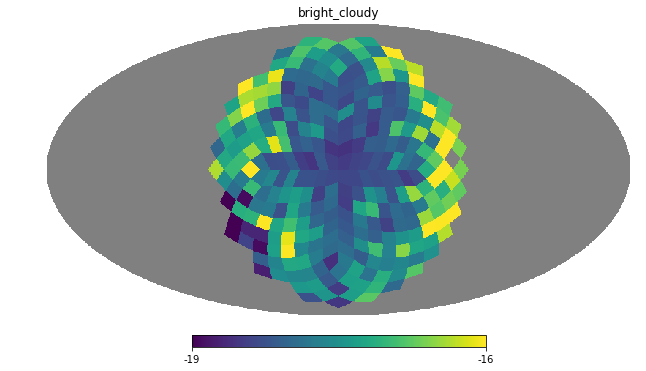

In [4]:
for key in cloud_types:
    good = np.where(files == cloud_types[key])[0][0]
    hp.mollview(hpmaps[good], title=key, rot=(0,90), min=-19, max=-16)

In [5]:
cs = CloudServer()

In [6]:
key='bright_cloudy'
cc = cloudConfig(nside=8)
start_indx = np.where(files == cloud_types[key])[0][0]
for i in range(5):
    newmap = fromHpix(hpmaps[start_indx+i], mjd=mjds[start_indx+i], cloud_config=cc)
    cs.postCloudMap(newmap)

In [7]:
to_predict = mjds[start_indx+i+1]
predicted_map = cs.predCloudMap(to_predict)

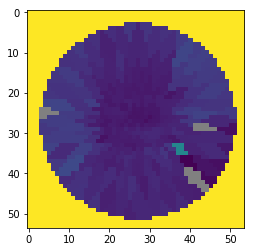

In [9]:
plt.imshow(predicted_map.cloudData)

In [13]:
cs._cachedMaps[3].vel

array([ 0.,  0.])